### `---------------Mandatory Information to fill------------`

### Group ID:
Group ID: Group 278
### Group Members Name with Student ID:
1. Rahul Prashar - 2024AB05058 - 100%
2. Rahul Agarwal - 2024AA05676 - 100%
3. Rahul Sinha - 2024AA05036 - 100%
4. Raghavendra Sathakarni A S - 2024AB05118 - 100%


# Scenario

A pharmaceutical company is conducting clinical trials to evaluate the effectiveness of three antiretroviral drug combinations for treating HIV-positive patients. Due to the ethical and cost constraints of clinical trials, it is critical to identify the most effective treatment regimen using the least number of patients. Each treatment (or “arm”) can lead to different outcomes depending on patient responses. The effectiveness of each treatment is evaluated using a reward function derived from the improvement in patients’ immune system markers and survival status.



# Problem Definition

You are provided with a clinical dataset where each record corresponds to a patient, including the treatment they received and the resulting health outcomes. Your task is to simulate a clinical trial environment using various MAB strategies to sequentially recommend treatments and observe outcomes. The objective is to maximize the overall success rate across trials by identifying and favouring the most effective treatment.



# Dataset

You will be provided a dataset containing the following fields:

* ***Age (age)***: Patient's age in years at baseline.
* ***Weight (wtkg)***: Continuous feature representing weight in kilograms at baseline.
* ***Gender (gender)***: Binary indicator of gender (0 = Female, 1 = Male).
* ***CD4 Counts (cd40, cd420)***: Integer values representing CD4 counts at baseline and 20+/-5 weeks.
* ***Treatment Indicator (trt)***: Categorical feature indicating the type of treatment received (0 = ZDV only, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only).
* ***Censoring Indicator (label)***: Binary indicator (1 = failure, 0 = censoring) denoting patient status.


***Link for accessing dataset:***
https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing


# Environment Setup

***Arms (Actions):*** The treatment types (trt)
* Arm 0: ZDV only
* Arm 1: ZDV + ddI
* Arm 2: ZDV + Zal
* Arm 3: ddI only


**Reward Function:**

Reward `r` is defined as:

`r = 1, if (label == 0) and (cd420 > cd40)`

`r = 0, otherwise`


  
This reward represents a successful treatment outcome as an increase in CD4 count and survival.

**Assumptions:**

*Number of Iterations:* Run the simulation for at least 1000 trials (iterations), with the option to extend the number of trials depending on the convergence behavior or observed reward trends. In each iteration, simulate one patient trial using one of the bandit policies.


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [35]:
# Constants
NUM_ITERATIONS = 1000 # Number of patient-trial simulations per policy

## Load Dataset (0.5M)

In [36]:
# Imports
import pandas as pd  # For data manipulation and CSV loading
import numpy as np   # For numerical operations and array handling
import random        # For random arm selection
import math          # For mathematical functions
import matplotlib.pyplot as plt    # For plotting results

# Code for Dataset loading and print dataset statistics
data = pd.read_csv('Clinical_Trial.csv')
print(f"Loaded dataset with {data.shape[0]} records and {data.shape[1]} columns.")
print(data.head())

Loaded dataset with 2139 records and 7 columns.
   age     wtkg  gender  cd40  cd420  trt  label
0   48  89.8128       0   422    477    2      0
1   61  49.4424       0   162    218    3      1
2   45  88.4520       1   326    274    3      0
3   47  85.2768       1   287    394    3      0
4   43  66.6792       1   504    353    0      0


## Designing Clinical Trial Environment (0.5M)

Bandit environment with treatment arms and compute the binary reward using CD4 count improvement and patient survival

In [37]:
# Code for environment setup along with reward function
class ClinicalTrialEnvironment:
    def __init__(self, data):
        self.data = data.copy()                         # Store a copy of the dataset
        self.arms = sorted(self.data['trt'].unique())   # List of unique treatment arms in our case [0, 1, 2, 3]

    def compute_reward(self, arm):
        # Filter dataset for patients who received the chosen arm
        subset = self.data[self.data['trt'] == arm]
        
        # Randomly sample one patient record from this arm
        record = subset.sample(n=1).iloc[0]
        
        # Determine success: label==0 (not failure) AND cd420 > cd40 (CD4 increase)
        reward = int((record['label'] == 0) and (record['cd420'] > record['cd40']))

        # Return the reward
        return reward


## Random policy for treatment selection (0.5M)
* Implementing the Random policy for treatment selection. 
* Runing the simulation for 1000 iterations and printing the treatment selected and reward at each iteration

In [38]:
# Run the environment with an agent that is guided by a random policy
class RandomPolicy:
    """
    Policy that selects each treatment arm uniformly at random.
    """
    def select_random_arm(self, arms):
        """
        Choose an arm randomly from the available arms.
        Args:
            arms (list): List of arm indices.
        Returns:
            int: Selected arm index.
        """
        return random.choice(arms)  # Uniform random selection

# Initialize environment and random policy
clinical_trial_env = ClinicalTrialEnvironment(data)
random_policy = RandomPolicy()
random_rewards = []  # To store rewards for plotting later

# Run NUM_ITERATIONS of random selections
for i in range(NUM_ITERATIONS):
    selected_arm = random_policy.select_random_arm(clinical_trial_env.arms)          # Pick an arm
    reward = clinical_trial_env.compute_reward(selected_arm)                         # Observe reward
    random_rewards.append(reward)                                                    # Record reward
    print(f"Iteration {i+1}: Treatment Selected {selected_arm}, Reward {reward}")     # Log iteration result

Iteration 1: Treatment Selected 0, Reward 0
Iteration 2: Treatment Selected 0, Reward 1
Iteration 3: Treatment Selected 2, Reward 0
Iteration 4: Treatment Selected 1, Reward 0
Iteration 5: Treatment Selected 0, Reward 0
Iteration 6: Treatment Selected 1, Reward 1
Iteration 7: Treatment Selected 1, Reward 1
Iteration 8: Treatment Selected 0, Reward 1
Iteration 9: Treatment Selected 3, Reward 1
Iteration 10: Treatment Selected 1, Reward 1
Iteration 11: Treatment Selected 3, Reward 1
Iteration 12: Treatment Selected 2, Reward 0
Iteration 13: Treatment Selected 3, Reward 0
Iteration 14: Treatment Selected 1, Reward 1
Iteration 15: Treatment Selected 0, Reward 1
Iteration 16: Treatment Selected 0, Reward 0
Iteration 17: Treatment Selected 3, Reward 1
Iteration 18: Treatment Selected 1, Reward 1
Iteration 19: Treatment Selected 1, Reward 1
Iteration 20: Treatment Selected 1, Reward 1
Iteration 21: Treatment Selected 3, Reward 1
Iteration 22: Treatment Selected 0, Reward 1
Iteration 23: Treat

## Using Greedy Policy (1M)
* Implement the Greedy policy that always selects the treatment with the highest average reward. 
* Run the simulation and print each iteration’s decision and reward.

In [39]:
# Run the environment with an agent that is guided by a greedy policy
class GreedyPolicy:
    """
    Policy that always exploits: selects the arm with highest estimated mean reward.
    Bootstraps by sampling each arm once initially.
    """
    def __init__(self, n_arms):
        """
        Initialize count and value trackers for each arm.
        Args:
            n_arms (int): Number of available treatment arms.
        """
        self.counts = [0] * n_arms    # Number of times each arm has been pulled
        self.values = [0.0] * n_arms  # Cumulative reward for each arm

    def select_arm_with_highest_average_reward(self, arms):
        """
        Select the arm with highest sample mean. If any arm is untried, select it first.
        Args:
            arms (list): List of arm indices.
        Returns:
            int: Selected arm index.
        """
        # If any arms are untried, sample one randomly
        # Avoids divide-by-zero and gives each arm a chance to be evaluated.
        untried_arms = [arm for arm in arms if self.counts[arm] == 0]
        if untried_arms:
            return random.choice(untried_arms)
                
        # Compute average rewards
        avg_rewards = [self.values[a] / self.counts[a] for a in arms]
        max_val = max(avg_rewards)
        
        # Break ties randomly
        candidates = [arms[i] for i, v in enumerate(avg_rewards) if v == max_val]
        return random.choice(candidates)

    def update(self, arm, reward):
        """
        Update internal estimates after pulling an arm.
        Args:
            arm (int): The arm index that was selected.
            reward (int): Observed reward (0 or 1).
        """
        self.counts[arm] += 1       # Increment pull count
        self.values[arm] += reward  # Accumulate reward

# Initialize greedy policy
greedy_policy = GreedyPolicy(len(clinical_trial_env.arms))
greedy_rewards = []  # To store greedy rewards for plotting

# Run NUM_ITERATIONS of greedy policy
for i in range(NUM_ITERATIONS):
    arm = greedy_policy.select_arm_with_highest_average_reward(clinical_trial_env.arms)  # Choose best-known arm or bootstrap
    reward = clinical_trial_env.compute_reward(arm)                                      # Observe reward
    greedy_policy.update(arm, reward)                                                    # Update estimates
    greedy_rewards.append(reward)                                                        # Record for plotting
    print(f"Iteration {i+1}: Arm selected {arm}, Reward {reward}")                                # Log iteration

Iteration 1: Arm selected 3, Reward 0
Iteration 2: Arm selected 0, Reward 0
Iteration 3: Arm selected 1, Reward 0
Iteration 4: Arm selected 2, Reward 0
Iteration 5: Arm selected 0, Reward 0
Iteration 6: Arm selected 3, Reward 0
Iteration 7: Arm selected 1, Reward 1
Iteration 8: Arm selected 1, Reward 1
Iteration 9: Arm selected 1, Reward 1
Iteration 10: Arm selected 1, Reward 0
Iteration 11: Arm selected 1, Reward 1
Iteration 12: Arm selected 1, Reward 1
Iteration 13: Arm selected 1, Reward 1
Iteration 14: Arm selected 1, Reward 1
Iteration 15: Arm selected 1, Reward 0
Iteration 16: Arm selected 1, Reward 1
Iteration 17: Arm selected 1, Reward 0
Iteration 18: Arm selected 1, Reward 1
Iteration 19: Arm selected 1, Reward 1
Iteration 20: Arm selected 1, Reward 1
Iteration 21: Arm selected 1, Reward 1
Iteration 22: Arm selected 1, Reward 1
Iteration 23: Arm selected 1, Reward 1
Iteration 24: Arm selected 1, Reward 1
Iteration 25: Arm selected 1, Reward 0
Iteration 26: Arm selected 1, Rewa

## Using Epsilon-Greedy Policy (1.5M)
* Implement the ε-Greedy policy with ε = 0.1, 0.2, 0.5. 
* Report iteration-wise selections and rewards. 
* Determine which ε yields the best result.

In [40]:
# Run the environment with an agent that is guided by a epsilon-greedy policy
class EpsilonGreedyPolicy(GreedyPolicy):
    """
    Extends GreedyPolicy to occasionally explore with probability ε.
    """
    def __init__(self, n_arms, epsilon):
        """
        Initialize epsilon-greedy with given exploration rate.
        Args:
            n_arms (int): Number of treatment arms.
            epsilon (float): Probability of exploration at each step.
        """
        super().__init__(n_arms)
        self.epsilon = epsilon  # Exploration probability

    def select_arm(self, arms):
        """
        With probability ε, select a random arm; otherwise, exploit best-known arm.
        Args:
            arms (list): List of arm indices.
        Returns:
            int: Selected arm.
        """
        if random.random() < self.epsilon:
            return random.choice(arms)                           # Exploration
        return super().select_arm(arms)                          # Exploitation

# Run epsilon-greedy for each ε value and collect rewards
epsilon_values = [0.1, 0.2, 0.5]
epsilon_rewards = {}

for eps in epsilon_values:
    policy = EpsilonGreedyPolicy(len(clinical_trial_env.arms), eps)
    rewards = []                                                # Track rewards for this epsilon
    
    print(f"\n--- ε-Greedy (ε={eps}) ---")
    
    for i in range(NUM_ITERATIONS):
        arm = policy.select_arm_with_highest_average_reward(clinical_trial_env.arms)
        reward = clinical_trial_env.compute_reward(arm)
        policy.update(arm, reward)
        rewards.append(reward)
        print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")
        
    epsilon_rewards[eps] = rewards                               # Store for plotting


--- ε-Greedy (ε=0.1) ---
Iteration 1: Arm 2, Reward 1
Iteration 2: Arm 3, Reward 0
Iteration 3: Arm 1, Reward 1
Iteration 4: Arm 0, Reward 0
Iteration 5: Arm 2, Reward 0
Iteration 6: Arm 1, Reward 1
Iteration 7: Arm 1, Reward 1
Iteration 8: Arm 1, Reward 1
Iteration 9: Arm 1, Reward 1
Iteration 10: Arm 1, Reward 1
Iteration 11: Arm 1, Reward 1
Iteration 12: Arm 1, Reward 1
Iteration 13: Arm 1, Reward 0
Iteration 14: Arm 1, Reward 1
Iteration 15: Arm 1, Reward 0
Iteration 16: Arm 1, Reward 1
Iteration 17: Arm 1, Reward 0
Iteration 18: Arm 1, Reward 1
Iteration 19: Arm 1, Reward 1
Iteration 20: Arm 1, Reward 0
Iteration 21: Arm 1, Reward 1
Iteration 22: Arm 1, Reward 1
Iteration 23: Arm 1, Reward 1
Iteration 24: Arm 1, Reward 0
Iteration 25: Arm 1, Reward 1
Iteration 26: Arm 1, Reward 0
Iteration 27: Arm 1, Reward 0
Iteration 28: Arm 1, Reward 1
Iteration 29: Arm 1, Reward 0
Iteration 30: Arm 1, Reward 1
Iteration 31: Arm 1, Reward 1
Iteration 32: Arm 1, Reward 0
Iteration 33: Arm 1, Re

# Using UCB (1M)
Implement the UCB algorithm for treatment selection and print each  iteration.

In [41]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
class UCBPolicy:
    """
    Implements the Upper Confidence Bound (UCB) algorithm to balance
    exploration and exploitation via an optimism term.
    """
    def __init__(self, n_arms):
        """
        Initialize counts and values for UCB.
        Args:
            n_arms (int): Number of treatment arms.
        """
        self.counts = [0] * n_arms      # Number of pulls per arm
        self.values = [0.0] * n_arms    # Sum of rewards per arm
        self.total_count = 0            # Total number of pulls

    def select_arm_highest_ucb(self, arms):
        """
        Select the arm with the highest upper confidence bound.
        Args:
            arms (list): List of arm indices.
        Returns:
            int: Selected arm.
        """
        # Ensure each arm is tried at least once
        for arm in arms:
            if self.counts[arm] == 0:
                return arm
                
        # Compute UCB score for each arm
        ucb_scores = []
        for arm in arms:
            avg_reward = self.values[arm] / self.counts[arm]
            bonus = math.sqrt((2 * math.log(self.total_count)) / self.counts[arm])
            ucb_scores.append(avg_reward + bonus)
        max_score = max(ucb_scores)
        candidates = [arms[i] for i, s in enumerate(ucb_scores) if s == max_score]
        return random.choice(candidates)                              # Tie-break randomly

    def update(self, arm, reward):
        """
        Update counts and values after observing a reward.
        Args:
            arm (int): Arm index that was pulled.
            reward (int): Observed binary reward.
        """
        self.counts[arm] += 1
        self.values[arm] += reward
        self.total_count += 1

# Initialize and run UCB policy
ucb_policy = UCBPolicy(len(clinical_trial_env.arms))
ucb_rewards = []                                                       # To store UCB rewards for plotting

for i in range(NUM_ITERATIONS):
    arm = ucb_policy.select_arm_highest_ucb(clinical_trial_env.arms)
    reward = clinical_trial_env.compute_reward(arm)
    ucb_policy.update(arm, reward)
    ucb_rewards.append(reward)
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")             # Log each step


Iteration 1: Arm 0, Reward 1
Iteration 2: Arm 1, Reward 0
Iteration 3: Arm 2, Reward 1
Iteration 4: Arm 3, Reward 0
Iteration 5: Arm 0, Reward 0
Iteration 6: Arm 2, Reward 1
Iteration 7: Arm 2, Reward 0
Iteration 8: Arm 1, Reward 0
Iteration 9: Arm 3, Reward 0
Iteration 10: Arm 0, Reward 1
Iteration 11: Arm 0, Reward 1
Iteration 12: Arm 2, Reward 0
Iteration 13: Arm 0, Reward 1
Iteration 14: Arm 0, Reward 0
Iteration 15: Arm 2, Reward 0
Iteration 16: Arm 3, Reward 1
Iteration 17: Arm 3, Reward 0
Iteration 18: Arm 1, Reward 0
Iteration 19: Arm 0, Reward 0
Iteration 20: Arm 0, Reward 0
Iteration 21: Arm 2, Reward 0
Iteration 22: Arm 3, Reward 1
Iteration 23: Arm 3, Reward 0
Iteration 24: Arm 1, Reward 1
Iteration 25: Arm 1, Reward 0
Iteration 26: Arm 0, Reward 1
Iteration 27: Arm 0, Reward 1
Iteration 28: Arm 0, Reward 1
Iteration 29: Arm 0, Reward 0
Iteration 30: Arm 2, Reward 1
Iteration 31: Arm 2, Reward 1
Iteration 32: Arm 2, Reward 0
Iteration 33: Arm 3, Reward 1
Iteration 34: Arm 3

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

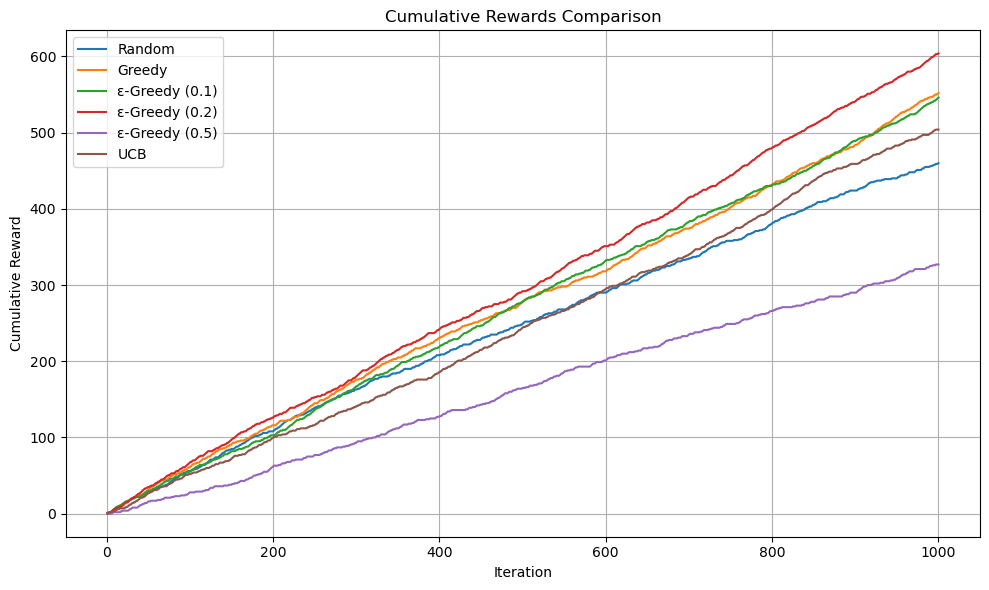

In [42]:
plt.figure(figsize=(10,6))  # Set figure size

iterations = np.arange(1, NUM_ITERATIONS+1)  # X-axis values

# Plot each policy’s cumulative rewards
plt.plot(iterations, np.cumsum(random_rewards), label='Random')
plt.plot(iterations, np.cumsum(greedy_rewards), label='Greedy')

for eps in epsilon_values:
    plt.plot(iterations, np.cumsum(epsilon_rewards[eps]), label=f'ε-Greedy ({eps})')

plt.plot(iterations, np.cumsum(ucb_rewards), label='UCB')
plt.xlabel('Iteration')                      # X-axis label
plt.ylabel('Cumulative Reward')              # Y-axis label
plt.title('Cumulative Rewards Comparison')   # Plot title
plt.legend()                                 # Show legend
plt.grid(True)                               # Enable grid
plt.tight_layout()                           # Adjust layout
plt.show()                                   # Display plot

## 🧾 Conclusion: Performance of Bandit Strategies
The simulation clearly demonstrates the effectiveness of different bandit strategies over 1,000 iterations:

* ε-Greedy (ε=0.2) now outperforms all other strategies, achieving the highest cumulative reward over 1,000 iterations. This suggests that a moderate exploration rate helps escape early suboptimal arms and leads to better long-term exploitation.

* Greedy and ε-Greedy (ε=0.1) perform closely behind, with very similar slopes. However, they fall short of ε=0.2 due to limited exploration, especially in the early iterations.

* Random sits in the middle — better than high-ε and UCB, but worse than the more strategic ε-Greedy variants. As expected, lack of learning limits its potential.

* ε-Greedy (ε=0.5) performs the worst. Its excessive exploration delays learning and reduces exploitation of the best arm, highlighting that too much randomness is as bad as too little.

* UCB underperforms here, suggesting it may be over-conservative or ill-suited to the reward distribution in this specific environment. Its regret grows steadily due to slow adaptation.


#### Final Takeaway:
The sweet spot in this scenario is ε=0.2, balancing exploration and exploitation effectively. Both Greedy and lower-ε variants can converge quickly but risk missing better arms. Too much exploration (ε=0.5) or uncertainty-based approaches (UCB) may be inefficient for clinical trial environments with sparse feedback.